In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
from google.colab import files
uploaded = files.upload()
# get data

Saving loan approval.csv to loan approval.csv


In [3]:
df = pd. read_csv("/content/loan approval.csv")
df['Status'] = df['Status'].map({'Y': 1, 'N': 0})
# read and set new status

In [4]:
y = df['Status'] # set y for train
X = df.drop(columns=['Status','Gender','Married','Dependents','Education','Self_Employed','Coapplicant','Term(month)','loan_History','Area']) # drop status and unimportant information

X.head()
#show data

,Income(dollar),Loan_Amount
0,144200.0,3500000
1,183000.0,0
2,188000.0,6100000
3,195000.0,13500000
4,196300.0,5300000


In [5]:
y.describe()

,Status
count,614.000000
mean,0.687296
std,0.463973
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


<Axes: xlabel='Income(dollar)', ylabel='Loan_Amount'>

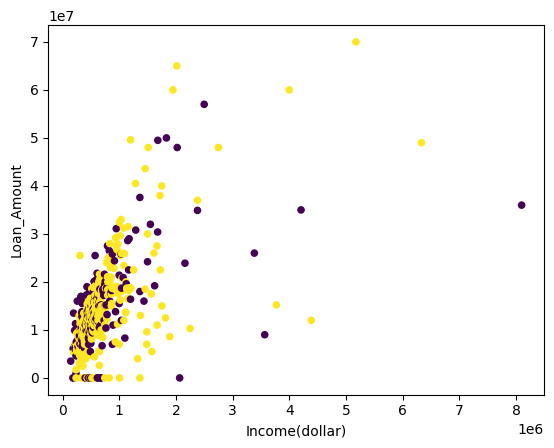

In [6]:
df.plot(kind='scatter', x='Income(dollar)', y='Loan_Amount', c=df['Status'], cmap=plt.cm.viridis, colorbar=False) # show graph

In [7]:
# ตั้งค่าสเกล
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
knn = KNeighborsClassifier(n_neighbors = 15) # K = 15
knn.fit(X_scaled, y)
# set model

KNeighborsClassifier(n_neighbors=15)

In [9]:
predicted = knn.predict(X_scaled)

In [10]:
conf_matrix_KNN = confusion_matrix(y, predicted)
precision_KNN = precision_score(y, predicted, average="macro")
recall_KNN = recall_score(y, predicted, average="macro")
f1_KNN = f1_score(y, predicted, average="macro")

print("Polynomial SVM efficiency \n")
print("Accuracy: ", accuracy_score(y, predicted))
print("Precision: ", precision_KNN)
print("Recall: ", recall_KNN)
print("F1-Score: ", f1_KNN)

print("Confusion Matrix:\n", conf_matrix_KNN)

# print Precision , Recall , F1-Score , Confusion Matrix

Polynomial SVM efficiency 

Accuracy:  0.6856677524429967
Precision:  0.5892425582080755
Recall:  0.5186858214849921
F1-Score:  0.46751922065900686
Confusion Matrix:
 [[ 14 178]
 [ 15 407]]


In [ ]:
import joblib

filename = 'knn_model.sav'
joblib.dump(knn, filename)

# export model

['knn_model.sav']